# Описание таблиц

__Таблица products:__
*   product_id - id товара
*   level1 - категория
*   level2 - подкатегория
*   name - наименование товара


__Таблица orders:__

*   order_id - номер чека
*   accepted_at - дата и время чека
*   product_id - id товара
*   quantity - кол-во товара в чеке
*   regular_price - регулярная цена
*   price - текущая цена
*   cost_price - закупочная цена

# Запустить этот код :

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_orders = pd.read_excel(r'C:\Users\User\Downloads\SIMULATIVE\Simulative_Pandas\Итоговый проект\data\orders.xlsx')
df_products = pd.read_excel(r'C:\Users\User\Downloads\SIMULATIVE\Simulative_Pandas\Итоговый проект\data\products.xlsx')

In [3]:
df_orders.head()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130


In [2]:
df_products.head()

,product_id,level1,level2,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...
1,2,Мучные кондитерские изделия,Мучные кондитерские изделия,Печенье Бодрость
2,3,Мясная гастрономия,"Сосиски, сардельки",Сосиски Стародворье
3,4,Чай,Черный чай,Чай Азерчай
4,5,Безалкогольные напитки,Соковая продукция,Морс Valio


# Самая ходовая товарная группа
По какой категории товаров продано больше всего позиций?

In [4]:
merged_df = df_orders.merge(df_products, on = 'product_id')
order_group = merged_df.groupby('level1')['quantity'].agg({'sum'}).reset_index()
max_idx = order_group['sum'].idxmax()
max_level1 = order_group.loc[max_idx, 'level1']
print(max_level1)

Безалкогольные напитки


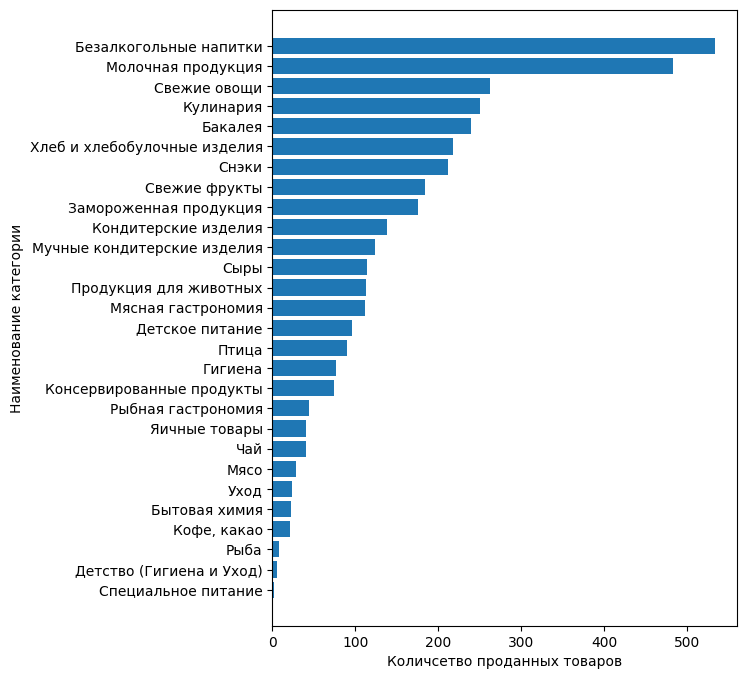

In [5]:
merged_df = df_orders.merge(df_products, on = 'product_id')
order_group = merged_df.groupby('level1')['quantity'].agg({'sum'}).reset_index()
plt.figure(figsize=(6, 8))
order_group_2 = order_group.sort_values('sum')
plt.barh(order_group_2['level1'], order_group_2['sum'])
plt.ylabel('Наименование категории')
plt.xlabel('Количсетво проданных товаров')
plt.show();

# Распределение продаж по подкатегориям
Оцените распределение количества проданных позиций в каждой товарной категории (level1) по подкатегориям (level2). Проиллюстрируйте свой результат расчетной таблицей.

In [6]:
merged_df = df_orders.merge(df_products, on = 'product_id')
merged_df_r = merged_df.groupby(['level1', 'level2'])['quantity'].agg(cnt = 'sum').reset_index().sort_values(by = 'cnt', ascending = False)
merged_df_r


,level1,level2,cnt
13,Безалкогольные напитки,Напитки,252
54,Кулинария,Готовые блюда,248
95,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,218
86,Снэки,Снэки соленые,180
12,Безалкогольные напитки,Воды питьевые,162
...,...,...,...
68,Мясная гастрономия,Субпродуктовые изделия,2
92,Уход,Средства по уходу за волосами,2
87,Специальное питание,Диетическое питание,2
17,Бытовая химия,Средства для сантехники,1


# Найти средний чек в заданную дату
Какой средний чек был 13.01.2022?

In [11]:
merged_df = df_orders.merge(df_products, on = 'product_id', how = 'left')
merged_df['date'] = merged_df['accepted_at'].dt.strftime('%Y-%m-%d')
merged_df13_01 = merged_df[merged_df['date'] == '2022-01-13']
sum_cheques = merged_df13_01.groupby('order_id').apply(lambda x : (x['price'] * x['quantity']).sum(),  include_groups=False)
avg_cheques = round(float(sum_cheques.mean()),2)
print(f"Средний чек 13.01.2022 : {avg_cheques} руб.")

Средний чек 13.01.2022 : 915.64 руб.


# Доля промо в заданной категории
Когда товар продается по промо-акции, его базовая цена не совпадает с фактической ценой.
Вам необходимо:
*   Посчитать, какую долю от общих продаж категории Сыры занимают промо (в штуках)

In [10]:
merged_df = df_orders.merge(df_products, on = 'product_id')
merged_df_chees = merged_df[merged_df['level1'] == 'Сыры'].copy()
merged_df_chees['promo'] = (merged_df_chees['price'] < merged_df_chees['regular_price'])
promo = {
    True : 'Промо-акция',
    False: 'Не промо-акция'
}
merged_df_chees['promo'] = merged_df_chees['promo'].map(promo)
ratio_chees = float(merged_df_chees[merged_df_chees['promo'] == 'Промо-акция']['quantity'].sum() / merged_df_chees['quantity'].sum())
ratio_chees = round(ratio_chees,2)
print(f"Доля, которую занимают промо-акции в категории Сыры: {ratio_chees}")

Доля, которую занимают промо-акции в категории Сыры: 0.31


*   Построить пайчарт, который это проиллюстрирует. На графике должны быть видны группы, соответствующие доли и понятные подписи к ним.

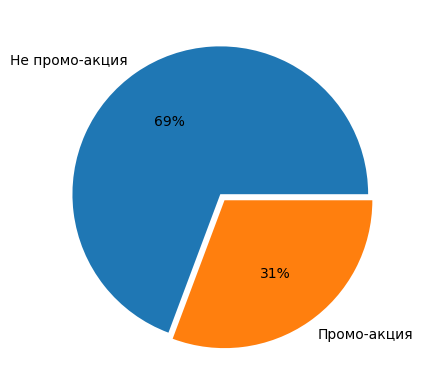

In [82]:
chees_by_promo = merged_df_chees.groupby('promo')['quantity'].sum().reset_index()
chees_by_promo
plt.pie(chees_by_promo['quantity'], labels=chees_by_promo['promo'], explode=[0, 0.05],autopct='%.0f%%');

# Посчитать маржу по категориям
Нужно посчитать маржу:
*   В рублях
*   В %     
Сделать это нужно по всем категориям level1 и отобразить с помощью 2 горизонтальных барчартов. Все подписи должны быть читаемыми и понятными.

In [13]:
merged_df = df_orders.merge(df_products, on = 'product_id')
merged_df['margin_rub'] = (merged_df.price - merged_df.cost_price) * merged_df.quantity
margin_price = merged_df.groupby('level1').agg({
    'margin_rub' : 'sum',
    'price' : lambda x: (x * merged_df.loc[x.index, 'quantity']).sum()
}).reset_index()
margin_price['margin_per'] = margin_price.margin_rub * 100 / margin_price.price
margin_price.head()

,level1,margin_rub,price,margin_per
0,Бакалея,8177,21766,37.567766
1,Безалкогольные напитки,20373,46107,44.186349
2,Бытовая химия,1441,5478,26.305221
3,Гигиена,2971,10055,29.547489
4,Детское питание,1817,5091,35.690434


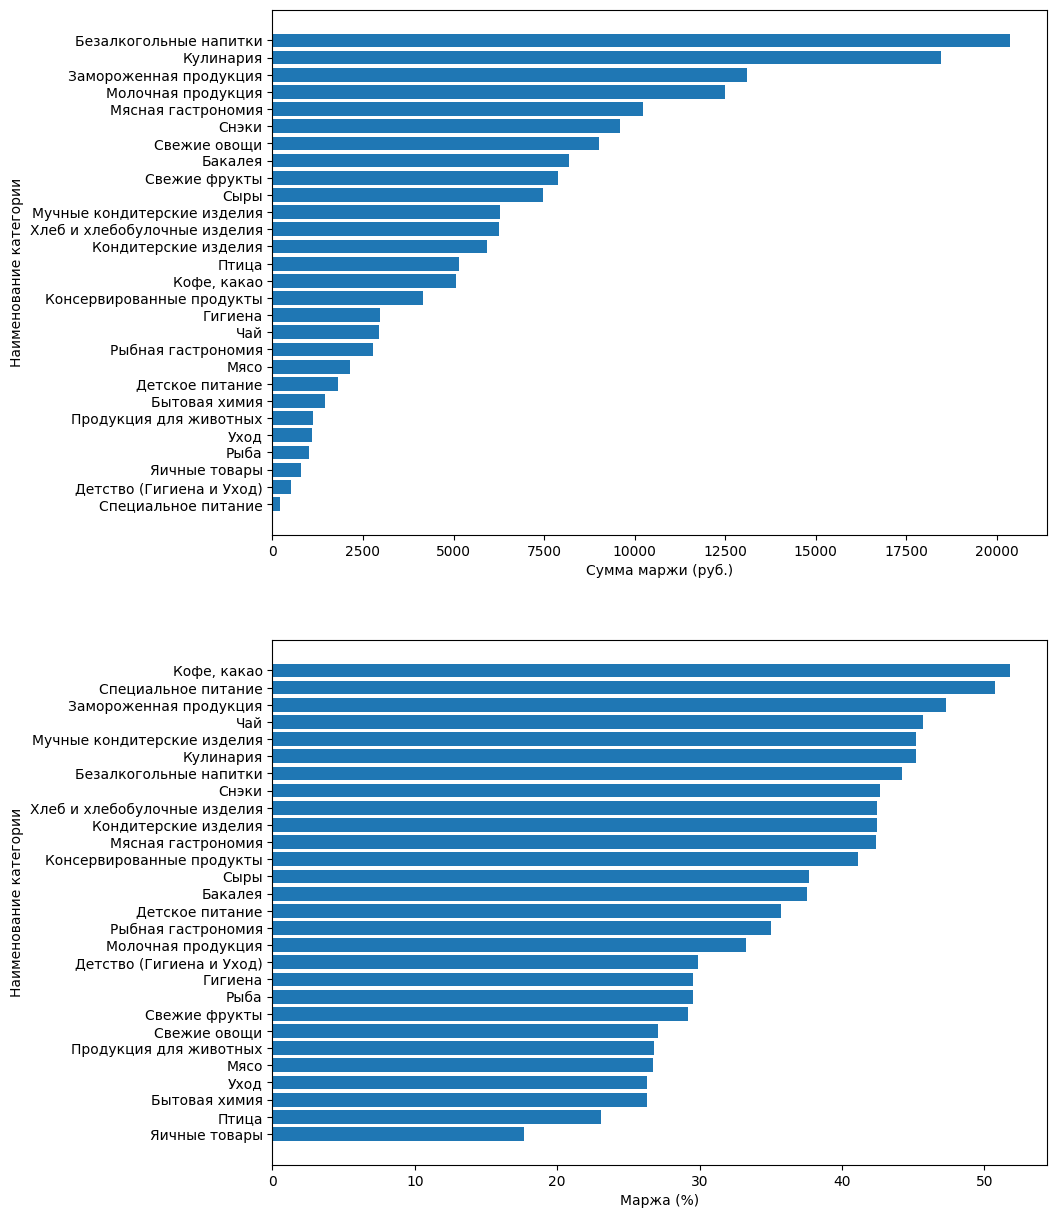

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))
margin_price_rub = margin_price.sort_values('margin_rub')
axes[0].barh(margin_price_rub['level1'], margin_price_rub['margin_rub'])
axes[0].set_ylabel('Наименование категории')
axes[0].set_xlabel('Сумма маржи (руб.)')
margin_price_per = margin_price.sort_values('margin_per')
axes[1].barh(margin_price_per['level1'], margin_price_per['margin_per'])
axes[1].set_ylabel('Наименование категории')
axes[1].set_xlabel('Маржа (%)');

# ABC анализ
*   Сделайте ABC-анализ продаж по количеству
*   Сделайте ABC-анализ по сумме продаж
*   Сделайте новый столбец, в котором будет итоговая группа на основании двух анализов. Например: A C.    
Важно: предлагаем провести ABC-анализ по подкатегориям, а не по отдельным товарам. Имеющихся у нас данных за небольшой период недостаточно для качественного анализа на уровне товаров. К тому же, количество товаров слишком велико, что может также исказить результаты. А ABC-анализ по подкатегориям даст более адекватную и интерпретируемую картину.

In [15]:
new_df = merged_df[['level2','quantity','price']].copy()
new_df['revenue'] = new_df.quantity * new_df.price
new_df = new_df.drop(columns='price', axis=1)
new_df.head()

,level2,quantity,revenue
0,Нерыбные продукты моря,1,169
1,Нерыбные продукты моря,1,169
2,Нерыбные продукты моря,1,169
3,Мягкие сыры,1,219
4,Мягкие сыры,1,219


In [16]:
import numpy as np
def perform_abc(df, index):
    """
    На вход функции подается DataFrame Pandas (df) и переменная - название столбца, по которому выполняется группировка (index).
    Столбец, по которому выполняется группировка должен быть один.
    df не должен содержать других столбцов,  по которым не выполняется ABC-анализ.
    """
    cols = list(df.columns)
    cols.remove(index)
    groupped_df = df.groupby(index).agg({col : 'sum' for col in cols})
    for col in cols:
        groupped_df[f'rel_{col}'] = groupped_df[col] / sum(groupped_df[col])
        groupped_df = groupped_df.sort_values(f'rel_{col}', ascending = False)
        groupped_df[f'cumsum_{col}'] = groupped_df[f'rel_{col}'].cumsum()
        groupped_df[f'abc_{col}'] = np.where(groupped_df[f'cumsum_{col}'] < 0.8 , 'A', np.where(groupped_df[f'cumsum_{col}'] < 0.95 , 'B', 'C'))
    abc_cols = [col for col in groupped_df.columns if col.startswith('abc_')]
    groupped_df['abc_combined'] = groupped_df[abc_cols].agg(' '.join, axis=1)
    # Удаляем столбцы, начинающиеся на abc_, кроме 'abc_combined'
    cols_to_drop = [col for col in abc_cols if col != 'abc_combined']
    groupped_df = groupped_df.drop(columns=cols_to_drop)
    return groupped_df[cols + ['abc_combined']]

In [18]:
perform_abc(new_df, 'level2')

,quantity,revenue,abc_combined
level2,,,
Готовые блюда,248,40356,A A
Напитки,252,24123,A A
Мясо птицы охлажденное,90,22349,A A
"Тепличные овощи, грибы",105,18329,A A
Снэки соленые,180,17293,A A
...,...,...,...
Средства для сантехники,1,239,C C
"Какао, горячий шоколад",2,238,C C
Уход за одеждой и обувью,3,235,C C
